In [2]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

## Juguemos con datos de verdad!

In [3]:
alerts = pd.read_pickle('alerts.pkl')

In [4]:
type(alerts)

pandas.core.frame.DataFrame

In [5]:
alerts.head()

,candid,dec,fid,mjd,magap_corr,magpsf_corr,magref,ra,sigmagap_corr,sigmagref,sigmapsf_corr
oid,,,,,,,,,,,
ZTF17aaaaavq,525449495115010039,49.906371,1,58279.449491,16.064439,16.070437,16.037001,326.583275,0.033280,0.032,0.033190
ZTF17aaaaavq,526428195115010015,49.906359,1,58280.428194,16.073295,16.066807,16.037001,326.583233,0.033369,0.032,0.032999
ZTF17aaaaavq,526455846215010013,49.906345,1,58280.455845,16.056232,16.060992,16.037001,326.583226,0.032861,0.032,0.032826
ZTF17aaaaavq,527433925115010012,49.906377,1,58281.433924,16.064030,16.068855,16.037001,326.583190,0.033130,0.032,0.033085
ZTF17aaaaavq,527434406215010029,49.906317,1,58281.434410,16.065981,16.062742,16.037001,326.583206,0.033304,0.032,0.032938


### Los dataframes de pandas son como numpy arrays pero con nombres en las columnas y filas indexadas

In [6]:
alerts.columns

Index(['candid', 'dec', 'fid', 'mjd', 'magap_corr', 'magpsf_corr', 'magref',
       'ra', 'sigmagap_corr', 'sigmagref', 'sigmapsf_corr'],
      dtype='object')

In [7]:
alerts.index

Index(['ZTF17aaaaavq', 'ZTF17aaaaavq', 'ZTF17aaaaavq', 'ZTF17aaaaavq',
       'ZTF17aaaaavq', 'ZTF17aaaaavq', 'ZTF17aaaaavq', 'ZTF17aaaaavq',
       'ZTF17aaaaavq', 'ZTF17aaaaavq',
       ...
       'ZTF19aaacrpc', 'ZTF19aaacrpc', 'ZTF19aaacrpc', 'ZTF19aaacrpc',
       'ZTF19aaacrpc', 'ZTF19aaacrpc', 'ZTF19aaacrpc', 'ZTF19aaacrpc',
       'ZTF19aaacrpc', 'ZTF19aaacrpc'],
      dtype='object', name='oid', length=1018315)

## Cómo elegir columnas y filas (slicing)

In [8]:
slice_alerts = alerts[['mjd', 'magpsf_corr', 'sigmapsf_corr', 'fid']]
slice_alerts.head()

,mjd,magpsf_corr,sigmapsf_corr,fid
oid,,,,
ZTF17aaaaavq,58279.449491,16.070437,0.033190,1
ZTF17aaaaavq,58280.428194,16.066807,0.032999,1
ZTF17aaaaavq,58280.455845,16.060992,0.032826,1
ZTF17aaaaavq,58281.433924,16.068855,0.033085,1
ZTF17aaaaavq,58281.434410,16.062742,0.032938,1


In [9]:
slice_alerts.iloc[[2, 3]]

,mjd,magpsf_corr,sigmapsf_corr,fid
oid,,,,
ZTF17aaaaavq,58280.455845,16.060992,0.032826,1
ZTF17aaaaavq,58281.433924,16.068855,0.033085,1


In [10]:
slice_alerts.loc[['ZTF19aaacrpc']]

,mjd,magpsf_corr,sigmapsf_corr,fid
oid,,,,
ZTF19aaacrpc,58486.420868,13.297551,0.013370,1
ZTF19aaacrpc,58487.451042,13.407758,0.014626,1
ZTF19aaacrpc,58495.261551,13.489080,0.016437,1
ZTF19aaacrpc,58503.534375,13.552889,0.018924,1
ZTF19aaacrpc,58509.234387,13.575654,0.018049,1
ZTF19aaacrpc,58538.252662,13.489724,0.016612,1
ZTF19aaacrpc,58541.235266,13.487539,0.017850,1
ZTF19aaacrpc,58547.290255,13.535105,0.021581,1
ZTF19aaacrpc,58561.210370,13.542108,0.018289,1


### ¿Cuántas alertas y curvas de luz hay?

In [11]:
len(slice_alerts)

1018315

In [12]:
oids = slice_alerts.index.unique()
len(oids)

27110

### ¿Hay algún NaN?

In [13]:
alerts.dropna(inplace=True)
slice_alerts.shape

(1018315, 4)

## Wait a minute... modificamos alerts pero cambió slice_alerts?! 

## Grafiquemos una curva de luz!

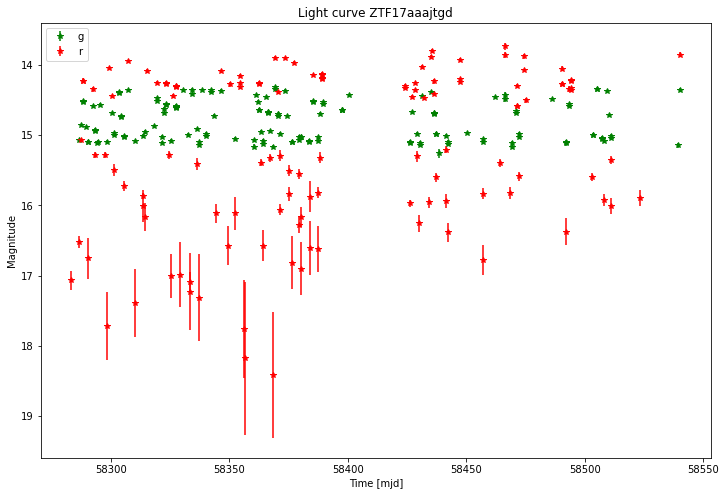

In [14]:
light_curve = slice_alerts.loc[['ZTF17aaajtgd']]
lc_g = light_curve[light_curve.fid == 1]
lc_r = light_curve[light_curve.fid == 2]
fig = plt.figure(figsize=(12, 8))
fig.set_facecolor('white')

plt.errorbar(lc_g['mjd'], lc_g['magpsf_corr'], yerr=lc_g['sigmapsf_corr'], fmt='*g', label='g')
plt.errorbar(lc_r['mjd'], lc_r['magpsf_corr'], yerr=lc_r['sigmapsf_corr'], fmt='*r', label='r')
plt.xlabel('Time [mjd]')
plt.ylabel('Magnitude')
plt.title('Light curve %s' % light_curve.index[0])
plt.legend()
plt.gca().invert_yaxis()

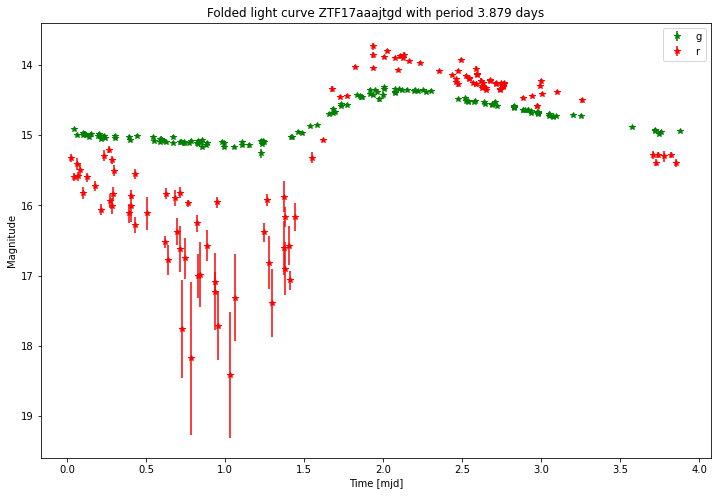

In [15]:
period = 3.879
fig = plt.figure(figsize=(12, 8))
fig.set_facecolor('white')
plt.errorbar(lc_g['mjd'] % period, lc_g['magpsf_corr'], yerr=lc_g['sigmapsf_corr'], fmt='*g', label='g')
plt.errorbar(lc_r['mjd'] % period, lc_r['magpsf_corr'], yerr=lc_r['sigmapsf_corr'], fmt='*r', label='r')
plt.xlabel('Time [mjd]')
plt.ylabel('Magnitude')
plt.title('Folded light curve %s with period %.3f days' % (light_curve.index[0], period))
plt.legend()
plt.gca().invert_yaxis()

## Calculemos los largos de las curvas de luz

In [16]:
lc_len = slice_alerts.groupby(level=0).count()
lc_len

,mjd,magpsf_corr,sigmapsf_corr,fid
oid,,,,
ZTF17aaaaavq,346,346,346,346
ZTF17aaaabpo,19,19,19,19
ZTF17aaaabrg,27,27,27,27
ZTF17aaaabte,48,48,48,48
ZTF17aaaabtj,14,14,14,14
...,...,...,...,...
ZTF18adbzccv,20,20,20,20
ZTF18adbzckw,20,20,20,20
ZTF18adbzclb,18,18,18,18


In [17]:
lc_len = lc_len[['mjd']].copy()
lc_len.rename(columns={'mjd': 'length'}, inplace=True)
lc_len.sort_values('length', inplace=True)
lc_len

,length
oid,
ZTF18abmoucu,12
ZTF18abtmtnv,12
ZTF18abmwqmp,12
ZTF17aaagyyp,12
ZTF18abotfhg,12
...,...
ZTF17aaaecor,391
ZTF17aabumwd,396
ZTF17aabvgjf,431


In [18]:
lc_len.tail()

,length
oid,
ZTF17aaaecor,391
ZTF17aabumwd,396
ZTF17aabvgjf,431
ZTF17aaaxaql,437
ZTF18aayxheb,439


## Veamos la curva más larga en ALeRCE

In [19]:
longest_lc = lc_len.index.values[-1]
print(f'https://alerce.online/object/{longest_lc}')

https://alerce.online/object/ZTF18aayxheb


# Ejemplo para la actividad 2

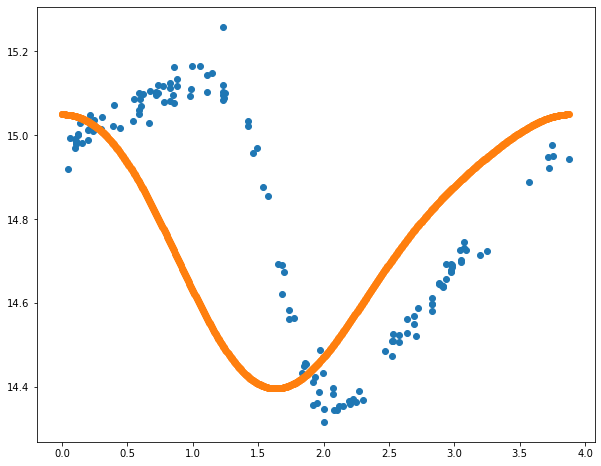

In [20]:
fig = plt.figure(figsize=(10, 8))
fig.set_facecolor('white')
plt.scatter(lc_g.mjd%period, lc_g.magpsf_corr)

t = np.linspace(0, period, 1000)
A = -0.1
B = 0.3
C = 0.05
D = 0.0
E = 14.75

y = (A*np.sin(2*np.pi*1/period*t) 
     + B*np.cos(2*np.pi*1/period*t) 
     + C*np.sin(2*np.pi*2/period*t)
     + D*np.cos(2*np.pi*2/period*t) 
     + E)

plt.scatter(t%period, y)